In [1]:
import pandas as pd

In [7]:
multilabel_df = pd.read_csv('imagenet_multilabel/multilabel.csv')
finegrained_df = pd.read_csv('imagenet_finegrained/finegrained.csv')
real_df = pd.read_csv('imagenet_real/real.csv')
label_errors_df = pd.read_csv('imagenet_label_errors/label_errors_og_met.csv')  # 'og_met' refers to the original methodology used for evaluating MTurk results.

In [8]:
multilabel_df

,id,category,original_label,proposed_labels,manually_validated,unclear_multi_labels,wrong_multi_labels,is_problematic
0,ILSVRC2012_val_00047963.JPEG,A,24,24,True,NaN,NaN,False
1,ILSVRC2012_val_00023277.JPEG,M,582,"415, 813, 868",True,NaN,"467, 582, 865, 886, 963",True
2,ILSVRC2012_val_00004014.JPEG,M,614,"614, 789",True,NaN,NaN,False
3,ILSVRC2012_val_00011754.JPEG,A,155,155,True,NaN,"204, 226",False
4,ILSVRC2012_val_00025035.JPEG,A,15,15,True,NaN,NaN,False
...,...,...,...,...,...,...,...,...
19995,ILSVRC2012_val_00043726.JPEG,M,590,"487, 590",True,NaN,"292, 416, 424, 521, 551, 617, 696, 823, 845, 889",False
19996,ILSVRC2012_val_00048120.JPEG,A,245,245,True,NaN,NaN,False
19997,ILSVRC2012_val_00002295.JPEG,A,43,43,True,NaN,NaN,False
19998,ILSVRC2012_val_00049534.JPEG,A,275,275,True,NaN,NaN,False


In [9]:
finegrained_df

,id,category,original_label,proposed_labels,manually_validated
0,ILSVRC2012_val_00047683.JPEG,B,325,322,True
1,ILSVRC2012_val_00030990.JPEG,A,47,47,True
2,ILSVRC2012_val_00002431.JPEG,A,704,704,True
3,ILSVRC2012_val_00033061.JPEG,M,442,"497, 442",True
4,ILSVRC2012_val_00002735.JPEG,M,668,"538, 668",True
...,...,...,...,...,...
9995,ILSVRC2012_val_00003714.JPEG,A,214,214,True
9996,ILSVRC2012_val_00018015.JPEG,A,671,671,True
9997,ILSVRC2012_val_00029538.JPEG,A,402,402,True
9998,ILSVRC2012_val_00040262.JPEG,A,921,921,True


In [10]:
real_df

,id,category,original_label,proposed_labels,manually_validated
0,ILSVRC2012_val_00009670.JPEG,A,26,26,False
1,ILSVRC2012_val_00036705.JPEG,A,948,948,False
2,ILSVRC2012_val_00003545.JPEG,A,227,227,False
3,ILSVRC2012_val_00047963.JPEG,A,24,24,False
4,ILSVRC2012_val_00023277.JPEG,M,582,"930, 963, 868, 923, 813, 415",True
...,...,...,...,...,...
49995,ILSVRC2012_val_00036807.JPEG,Z,648,NaN,True
49996,ILSVRC2012_val_00045315.JPEG,M,672,"672, 970",True
49997,ILSVRC2012_val_00047536.JPEG,A,618,618,False
49998,ILSVRC2012_val_00026559.JPEG,A,891,891,False


In [11]:
label_errors_df

,id,category,original_label,proposed_labels,manually_validated,cl_label,mturk
0,ILSVRC2012_val_00000293.JPEG,A,0,0,True,48,"{'given': 5, 'guessed': 0, 'neither': 0, 'both..."
1,ILSVRC2012_val_00030740.JPEG,A,0,0,True,389,"{'given': 5, 'guessed': 0, 'neither': 0, 'both..."
2,ILSVRC2012_val_00031094.JPEG,A,0,0,True,389,"{'given': 5, 'guessed': 0, 'neither': 0, 'both..."
3,ILSVRC2012_val_00037383.JPEG,X,0,NaN,True,389,"{'given': 2, 'guessed': 1, 'neither': 2, 'both..."
4,ILSVRC2012_val_00000236.JPEG,A,1,1,True,115,"{'given': 5, 'guessed': 0, 'neither': 0, 'both..."
...,...,...,...,...,...,...,...
5435,ILSVRC2012_val_00020175.JPEG,A,999,999,True,794,"{'given': 5, 'guessed': 0, 'neither': 0, 'both..."
5436,ILSVRC2012_val_00024774.JPEG,M,999,"999, 861",True,861,"{'given': 0, 'guessed': 1, 'neither': 0, 'both..."
5437,ILSVRC2012_val_00038640.JPEG,X,999,NaN,True,700,"{'given': 2, 'guessed': 2, 'neither': 0, 'both..."
5438,ILSVRC2012_val_00042270.JPEG,A,999,999,True,700,"{'given': 5, 'guessed': 0, 'neither': 0, 'both..."


In [12]:
from visualization.plot_functions import process_and_plot_stacked_bar

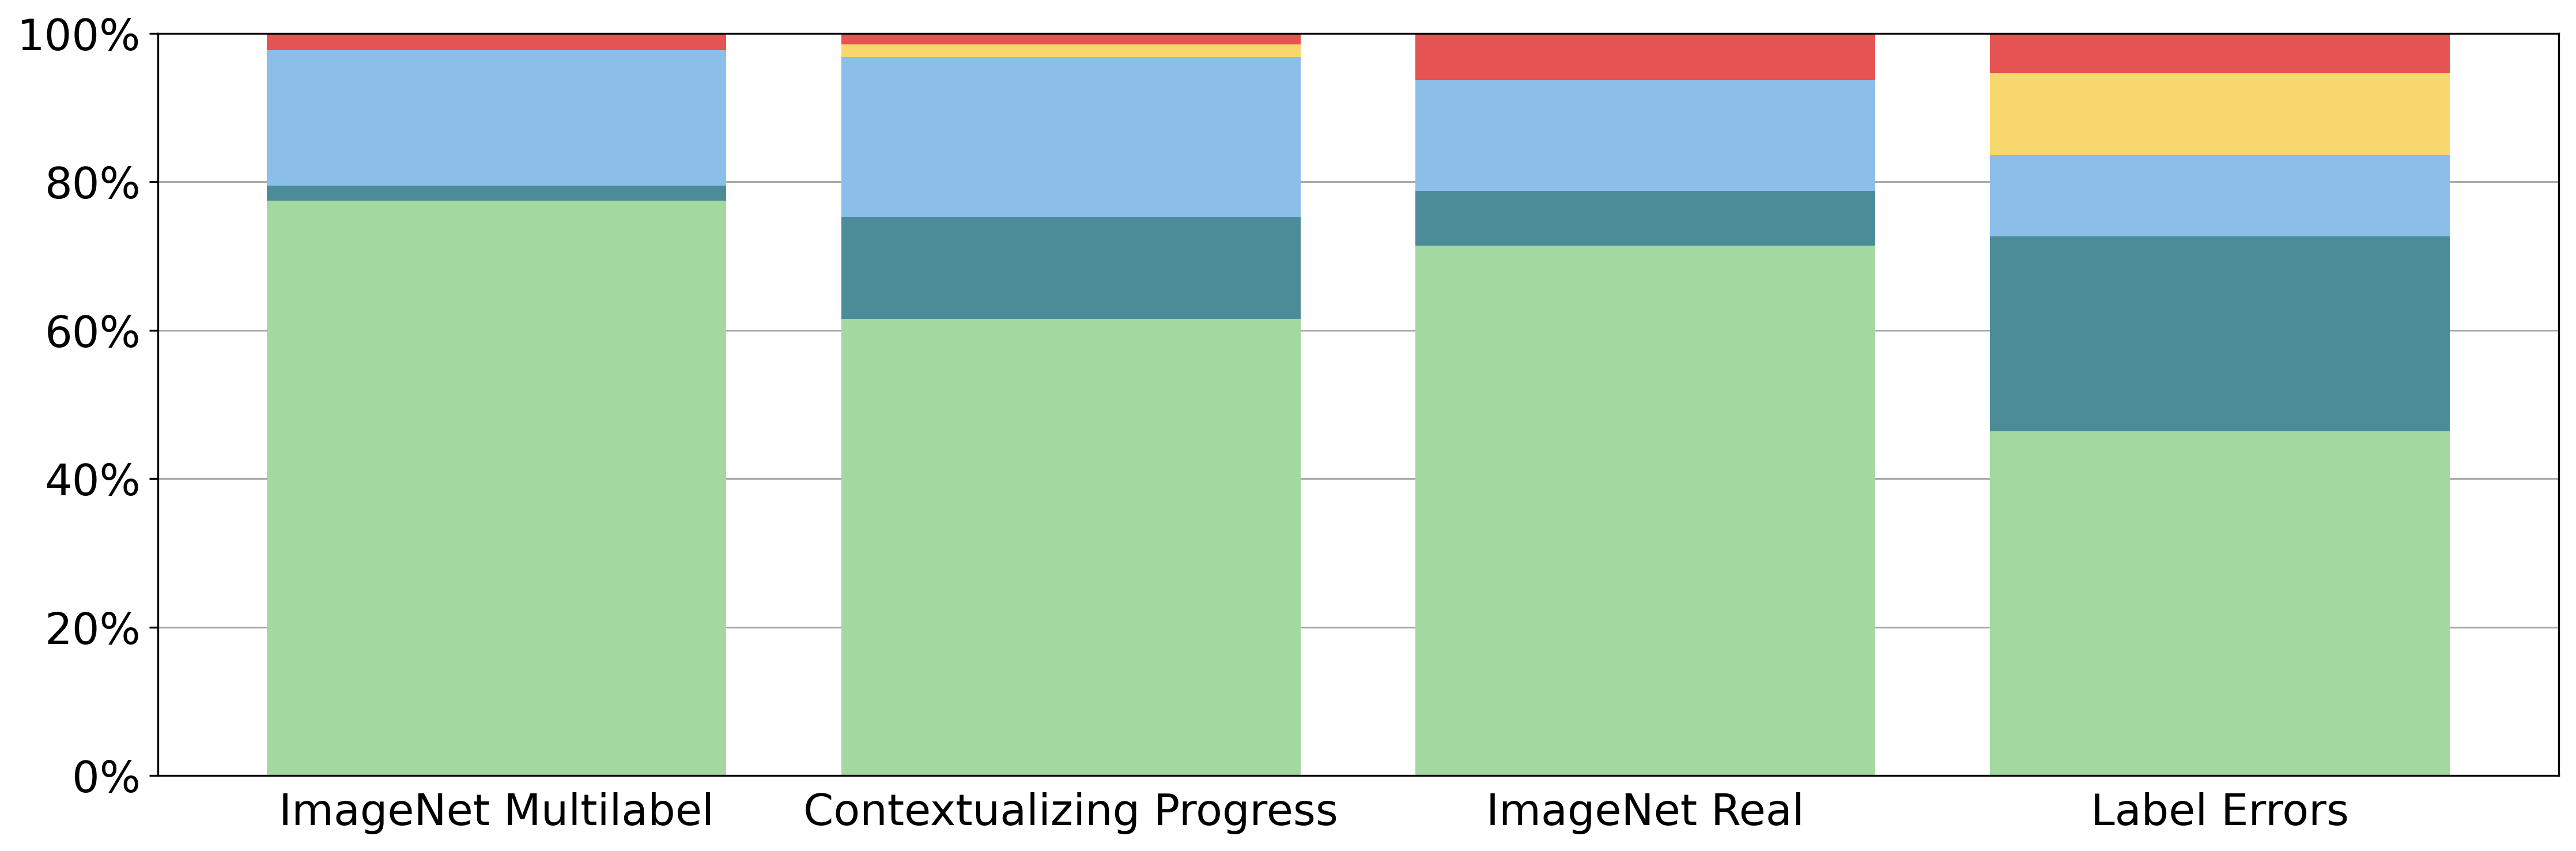

In [13]:
process_and_plot_stacked_bar([multilabel_df, finegrained_df, real_df, label_errors_df])